In [25]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [26]:
url="C:\\Users\\rajsu\\Desktop\\shubham raj\\Iris.csv"
names=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
dataset=pd.read_csv(url,names=names)


In [27]:
print(dataset.shape)

(151, 5)


In [28]:
print(dataset.head(20))

      SepalLength    SepalWidth    PetalLength    PetalWidth        Class
Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa
6             5.4           3.9            1.7           0.4  Iris-setosa
7             4.6           3.4            1.4           0.3  Iris-setosa
8             5.0           3.4            1.5           0.2  Iris-setosa
9             4.4           2.9            1.4           0.2  Iris-setosa
10            4.9           3.1            1.5           0.1  Iris-setosa
11            5.4           3.7            1.5           0.2  Iris-setosa
12            4.8           3.4       

In [29]:
print(dataset.describe())

       SepalLength SepalWidth PetalLength PetalWidth        Class
count          151        151         151        151          151
unique          36         24          44         23            4
top            5.0        3.0         1.5        0.2  Iris-setosa
freq            10         26          14         28           50


In [30]:
print(dataset.groupby('Class').size())

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Species             1
dtype: int64


In [31]:
dataset.dtypes

SepalLength    object
SepalWidth     object
PetalLength    object
PetalWidth     object
Class          object
dtype: object

In [32]:
# Function to convert a value to float if possible, otherwise return NaN
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return float('nan')

# Convert 'SepalLength' column to float using the custom conversion function
dataset['SepalLength'] = dataset['SepalLength'].map(convert_to_float)
dataset['SepalWIDTH'] = dataset['SepalWidth'].map(convert_to_float)
dataset['PetalLength'] = dataset['PetalLength'].map(convert_to_float)
dataset['PetalWidth'] = dataset['PetalWidth'].map(convert_to_float)



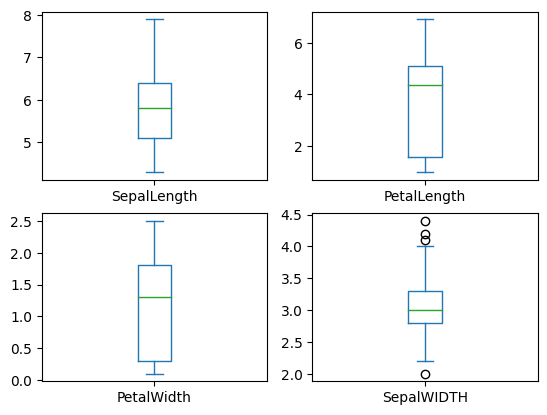

In [33]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [34]:
array=dataset.values
X= array[:,0:4]
Y= array[:,4]
validation_size =0.20
seed = 6
X_train,X_test,Y_train,Y_test =model_selection.train_test_split( X, Y, test_size=validation_size, random_state=seed)

In [35]:
seed =6
scoring = 'accuracy'

In [44]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))


result = []
names = []
  
for name , model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle= True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    result.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)  

LR: 0.958333 (0.055902)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.925000 (0.078617)
NB: 0.966667 (0.055277)
SVM: 0.950000 (0.066667)


c:\Users\rajsu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\rajsu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st